In [2]:
import pandas as pd
from pandas import Timestamp as ts
import numpy as np
import seaborn as sns
import datetime as dt
import scipy as ss
import statsmodels as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
%matplotlib inline

In [3]:
# Выгружаю датафреймы

base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = ['https://disk.yandex.ru/d/FUi5uSd6BfG_ig', 'https://disk.yandex.ru/d/t9Li4JOfgxuUrg', 'https://disk.yandex.ru/d/Gbt-yAcQrOe3Pw']                # ссылки на данные

file_names = ['olist_customers_dataset.csv', 'olist_orders_dataset.csv', 'olist_order_items_dataset.csv']
datasets = ['olist_customers_dataset_df', 'olist_orders_dataset_df', 'olist_order_items_dataset_df']

for i in range(3):
    final_url = base_url + urlencode(dict(public_key=public_key[i]))
    response = requests.get(final_url)
    download_url = response.json()['href']
    globals()[datasets[i]] = pd.read_csv(download_url)

NameError: name 'urlencode' is not defined

## Проект e-commerce: вариант 1 
Продакт-менеджер Василий попросил вас проанализировать совершенные покупки и ответить на следующие вопросы:

#### 1. Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов) 

#### 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (5 баллов)

#### 3. По каждому товару определить, в какой день недели товар чаще всего покупается. (5 баллов)

#### 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов) 

#### 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. Описание подхода можно найти тут. (10 баллов)

#### 6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. Описание подхода можно найти тут. (35 баллов)

Для решения задачи проведи предварительное исследование данных и сформулируй, что должно считаться покупкой. Обосновать свой выбор ты можешь с помощью фактов оплат, статусов заказов и других имеющихся данных.

Файлы:

 #### olist_customers_datase.csv — таблица с уникальными идентификаторами пользователей
customer_id — позаказный идентификатор пользователя

customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)

customer_zip_code_prefix —  почтовый индекс пользователя

customer_city —  город доставки пользователя

customer_state —  штат доставки пользователя

#### olist_orders_dataset.csv —  таблица заказов
order_id —  уникальный идентификатор заказа (номер чека)

customer_id —  позаказный идентификатор пользователя

order_status —  статус заказа

order_purchase_timestamp —  время создания заказа

order_approved_at —  время подтверждения оплаты заказа

order_delivered_carrier_date —  время передачи заказа в логистическую службу

order_delivered_customer_date —  время доставки заказа

order_estimated_delivery_date —  обещанная дата доставки

#### olist_order_items_dataset.csv —  товарные позиции, входящие в заказы
order_id —  уникальный идентификатор заказа (номер чека)

order_item_id —  идентификатор товара внутри одного заказа

product_id —  ид товара (аналог штрихкода)

seller_id — ид производителя товара

shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике

price —  цена за единицу товара

freight_value —  вес товара

— Пример структуры данных можно визуализировать по order_id == 00143d0f86d6fbd9f9b38ab440ac16f5

Уникальные статусы заказов в таблице olist_orders_dataset:

created —  создан
approved —  подтверждён
invoiced —  выставлен счёт
processing —  в процессе сборки заказа
shipped —  отгружен со склада
delivered —  доставлен пользователю
unavailable —  недоступен
canceled —  отменён

In [54]:
# customer_id — позаказный идентификатор пользователя
# customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)
# customer_zip_code_prefix —  почтовый индекс пользователя
# customer_city —  город доставки пользователя
# customer_state —  штат доставки пользователя

olist_customers_dataset_df

NameError: name 'olist_customers_dataset_df' is not defined

In [55]:
# Смотрю на количество уникальных элементов 
olist_customers_dataset_df.nunique()

NameError: name 'olist_customers_dataset_df' is not defined

In [56]:
# order_id —  уникальный идентификатор заказа (номер чека)
# customer_id —  позаказный идентификатор пользователя
# order_status —  статус заказа
# order_purchase_timestamp —  время создания заказа
# order_approved_at —  время подтверждения оплаты заказа
# order_delivered_carrier_date —  время передачи заказа в логистическую службу
# order_delivered_customer_date —  время доставки заказа
# order_estimated_delivery_date —  обещанная дата доставки

olist_orders_dataset_df

NameError: name 'olist_orders_dataset_df' is not defined

In [57]:
# order_id —  уникальный идентификатор заказа (номер чека)
# order_item_id —  идентификатор товара внутри одного заказа
# product_id —  ид товара (аналог штрихкода)
# seller_id — ид производителя товара
# shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике
# price —  цена за единицу товара
# freight_value —  вес товара

olist_order_items_dataset_df

NameError: name 'olist_order_items_dataset_df' is not defined

In [58]:
# Проверяю форматы колонок
olist_customers_dataset_df.dtypes

NameError: name 'olist_customers_dataset_df' is not defined

In [59]:
# Проверяю форматы колонок
olist_orders_dataset_df.dtypes

NameError: name 'olist_orders_dataset_df' is not defined

In [60]:
# Перевод в формат даты
olist_orders_dataset_df['order_purchase_timestamp'] = pd.to_datetime(olist_orders_dataset_df['order_purchase_timestamp'])
olist_orders_dataset_df['order_approved_at'] = pd.to_datetime(olist_orders_dataset_df['order_approved_at'])
olist_orders_dataset_df['order_delivered_carrier_date'] = pd.to_datetime(olist_orders_dataset_df['order_delivered_carrier_date'])
olist_orders_dataset_df['order_delivered_customer_date'] = pd.to_datetime(olist_orders_dataset_df['order_delivered_customer_date'])
olist_orders_dataset_df['order_estimated_delivery_date'] = pd.to_datetime(olist_orders_dataset_df['order_estimated_delivery_date'])
olist_order_items_dataset_df['shipping_limit_date'] = pd.to_datetime(olist_order_items_dataset_df['shipping_limit_date'])

NameError: name 'olist_orders_dataset_df' is not defined

In [61]:
# Уточняю форматы колонок
olist_orders_dataset_df.dtypes

NameError: name 'olist_orders_dataset_df' is not defined

In [62]:
# Уточняю форматы колонок
olist_order_items_dataset_df.dtypes

NameError: name 'olist_order_items_dataset_df' is not defined

In [63]:
# Промежуточный татафрейм
tmp_df = olist_orders_dataset_df.merge(olist_order_items_dataset_df, how='right', on='order_id')
tmp_df

NameError: name 'olist_orders_dataset_df' is not defined

In [64]:
all_info_df = olist_customers_dataset_df.merge(tmp_df, how='right', on='customer_id')

NameError: name 'olist_customers_dataset_df' is not defined

In [65]:
# Объеденил все датафреймы 
all_info_df

NameError: name 'all_info_df' is not defined

In [66]:
# Смотрю на количество пропущенных полей
all_info_df.isna().sum()

NameError: name 'all_info_df' is not defined

In [67]:
# Проверка на дупликаты
all_info_df.drop_duplicates()

NameError: name 'all_info_df' is not defined

Статусы говорящие о том, что товар не был куплен (т.к. эти значения указывают на прямое влияние самого клента)

created, 
unavailable, 
canceled

## 1. Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов) 

In [68]:
all_info_df.query('order_status != "created" and order_status != "unavailable" and order_status != "canceled"').groupby('customer_unique_id').agg({'order_id':'count'}).query('order_id == 1').count()

NameError: name 'all_info_df' is not defined

### 83179
Тут я посчитал количество чеков на каждого уникального пользователя и отсеил неуникальные

## 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (5 баллов)

In [69]:
# Датафрейм со временем исполнения заказов
order_delivery_time_df = olist_orders_dataset_df 

NameError: name 'olist_orders_dataset_df' is not defined

In [70]:
# Проверка на уникальность
order_delivery_time_df.nunique()

NameError: name 'order_delivery_time_df' is not defined

In [71]:
# Перевожу поля со временем в соответсвтужющий формат
order_delivery_time_df['order_purchase_timestamp'] = pd.to_datetime(order_delivery_time_df['order_purchase_timestamp'])
order_delivery_time_df['order_approved_at'] = pd.to_datetime(order_delivery_time_df['order_approved_at'])
order_delivery_time_df['order_delivered_carrier_date'] = pd.to_datetime(order_delivery_time_df['order_delivered_carrier_date'])
order_delivery_time_df['order_delivered_customer_date'] = pd.to_datetime(order_delivery_time_df['order_delivered_customer_date'])
order_delivery_time_df['order_estimated_delivery_date'] = pd.to_datetime(order_delivery_time_df['order_estimated_delivery_date'])

NameError: name 'order_delivery_time_df' is not defined

In [72]:
# Отсеил доставленные
order_delivery_time_df = order_delivery_time_df.query('order_status != "delivered"')

NameError: name 'order_delivery_time_df' is not defined

In [73]:
order_delivery_time_df

NameError: name 'order_delivery_time_df' is not defined

 ### Идея в следующем: Я оставлю толькло те заказы, которые не пришли и сгруппирую по причине

In [74]:
# Тут видно, что большинство заказов имеют статус доставки. Скорее всего эти заказы не доставлены в указаные сроки
order_delivery_time_df.order_status.value_counts()

NameError: name 'order_delivery_time_df' is not defined

In [75]:
# Ориентироваться буду на обещанную дату доставки
order_delivery_time_df['promised_year_and_month_of_delivery'] = order_delivery_time_df.order_estimated_delivery_date.astype("datetime64[M]")

NameError: name 'order_delivery_time_df' is not defined

In [76]:
# количество недоставленных заказов
number_of_undelivered_orders_df = order_delivery_time_df.groupby(['order_status', 'promised_year_and_month_of_delivery']).agg({'order_id':'count'})

NameError: name 'order_delivery_time_df' is not defined

In [77]:
number_of_undelivered_orders_df = number_of_undelivered_orders_df.reset_index()
number_of_undelivered_orders_df = number_of_undelivered_orders_df.rename(columns={'order_id':'order_count'})
# Отбираю тролько месяц
number_of_undelivered_orders_df['promised_month_of_delivery'] = number_of_undelivered_orders_df.promised_year_and_month_of_delivery.dt.month

NameError: name 'number_of_undelivered_orders_df' is not defined

In [78]:
number_of_undelivered_orders_df

NameError: name 'number_of_undelivered_orders_df' is not defined

In [79]:
# Вывожу сколько в среднем не доставляется в месяц и группирую по причинам
number_of_undelivered_orders_df = number_of_undelivered_orders_df.groupby(['order_status']).agg({'order_count':'mean'}).sort_values('order_count', ascending = False)
number_of_undelivered_orders_df

NameError: name 'number_of_undelivered_orders_df' is not defined

## 3. По каждому товару определить, в какой день недели товар чаще всего покупается. (5 баллов)

In [80]:
# Датафрейм с покупками
# 'order_status != "created" or order_status != "unavailable" or order_status != "canceled"'
unsuitable_statuses = ['created', 'unavailable', 'canceled']
all_purchases_df = all_info_df.copy().query('order_status not in @unsuitable_statuses')
source_for_weekly_purchases_df = all_purchases_df

NameError: name 'all_info_df' is not defined

In [81]:
all_purchases_df

NameError: name 'all_purchases_df' is not defined

In [82]:
# Беру датафрем с покупками
order_delivery_time_df = all_purchases_df.copy()
order_delivery_time_df['order_purchase_timestamp'] = pd.to_datetime(order_delivery_time_df['order_purchase_timestamp'])
order_delivery_time_df['order_approved_at'] = pd.to_datetime(order_delivery_time_df['order_approved_at'])
order_delivery_time_df['order_delivered_carrier_date'] = pd.to_datetime(order_delivery_time_df['order_delivered_carrier_date'])
order_delivery_time_df['order_delivered_customer_date'] = pd.to_datetime(order_delivery_time_df['order_delivered_customer_date'])
order_delivery_time_df['order_estimated_delivery_date'] = pd.to_datetime(order_delivery_time_df['order_estimated_delivery_date'])
order_delivery_time_df['shipping_limit_date'] = pd.to_datetime(order_delivery_time_df['shipping_limit_date'])

NameError: name 'all_purchases_df' is not defined

In [83]:
# Проверка уникальных значений 
order_delivery_time_df.nunique()

NameError: name 'order_delivery_time_df' is not defined

In [84]:
# Создаю колонку с днем недели покупки
order_delivery_time_df['weekday'] = order_delivery_time_df.order_purchase_timestamp.dt.day_name()


NameError: name 'order_delivery_time_df' is not defined

In [85]:
order_delivery_time_df

NameError: name 'order_delivery_time_df' is not defined

In [86]:
# В order_delivery_time_df_tmp смотрю сколько раз упаминается неделя 
order_delivery_time_df_tmp = order_delivery_time_df.groupby(['product_id','weekday']).agg({'weekday':'count'}).rename(columns={'weekday':'weekday_count'})
order_delivery_time_df_tmp = order_delivery_time_df_tmp.reset_index()
weekly_df = order_delivery_time_df_tmp
order_delivery_time_df_tmp

NameError: name 'order_delivery_time_df' is not defined

In [43]:
# Сортирую order_delivery_time_df_tmp поубыванию и удаляю дубликаты по product_id тем самым оставляя максимальные значения упоминания дня недели
order_delivery_time_df_tmp = order_delivery_time_df_tmp.groupby(['product_id','weekday']).agg({'weekday_count':'max'}).sort_values('weekday_count', ascending = False).reset_index()
weekly_df = order_delivery_time_df_tmp.drop_duplicates('product_id').set_index('product_id').drop('weekday_count',axis=1)
weekly_df

NameError: name 'order_delivery_time_df_tmp' is not defined

## 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов) 

In [44]:
# Беру датафрем с покупками
source_for_weekly_purchases_df = all_purchases_df.copy()

NameError: name 'all_purchases_df' is not defined

Нужные поля:

customer_id — позаказный идентификатор пользователя

customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)

order_id —  уникальный идентификатор заказа (номер чека)

order_purchase_timestamp —  время создания заказа

order_approved_at —  время подтверждения оплаты заказа

order_delivered_carrier_date —  время передачи заказа в логистическую службу

order_delivered_customer_date —  время доставки заказа


In [45]:
# За заказ человеком буду считать статусы кроме этих
# created 
# unavailable 
# canceled

source_for_weekly_purchases_df = source_for_weekly_purchases_df.drop(['customer_zip_code_prefix', 'customer_city', 'customer_state', 'order_status', 'order_estimated_delivery_date', 'seller_id', 'shipping_limit_date', 'price', 'freight_value', 'order_item_id','product_id'], axis= 1)

NameError: name 'source_for_weekly_purchases_df' is not defined

In [46]:
source_for_weekly_purchases_df

NameError: name 'source_for_weekly_purchases_df' is not defined

In [47]:
# добавляем колонку создания заказа в формате "год-месяц"
source_for_weekly_purchases_df['year_month_order'] = source_for_weekly_purchases_df.order_purchase_timestamp.astype("datetime64[M]")

NameError: name 'source_for_weekly_purchases_df' is not defined

In [48]:
# группирую по году-месяцу и пользователю и считаю количество покупок на пользователя в месяц
result_source_for_weekly_purchases_df = source_for_weekly_purchases_df.groupby(['year_month_order', 'customer_unique_id'], as_index=False).agg({'order_purchase_timestamp': 'count'})
result_source_for_weekly_purchases_df.sort_values('order_purchase_timestamp', ascending = False)

NameError: name 'source_for_weekly_purchases_df' is not defined

In [49]:
# week_in_month - количество недель в месяце
result_source_for_weekly_purchases_df['week_in_month'] = source_for_weekly_purchases_df.order_approved_at.dt.days_in_month / 7

NameError: name 'source_for_weekly_purchases_df' is not defined

In [50]:
# pays_per_week - количество покупок в неделю
result_source_for_weekly_purchases_df['pays_per_week'] = result_source_for_weekly_purchases_df.order_purchase_timestamp / result_source_for_weekly_purchases_df.week_in_month
result_source_for_weekly_purchases_df = result_source_for_weekly_purchases_df.drop(['order_purchase_timestamp', 'week_in_month'], axis = 1).set_index('customer_unique_id')

NameError: name 'result_source_for_weekly_purchases_df' is not defined

In [ ]:
result_source_for_weekly_purchases_df

## 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. Описание подхода можно найти тут. (10 баллов)

In [51]:
# Если перевести дословно у какой из группы на третий месяц вернулось больше всего человек

Беру датафрейм с покупками

In [711]:
tmp_df = all_purchases_df.copy()
tmp_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,00010242fe8c5a6d1ba2dd792cb16214,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,00018f77f2f0320c557190d7a144bdd3,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,000229ec398224ef6ca0657da4fc703e,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,00024acbcdf0a6daa1e931b038114c75,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,00042b26cf59d7ce69dfabb4e55b4fd9,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,b51593916b4b8e0d6f66f2ae24f2673d,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,fffc94f6ce00a00581880bf54a75a037,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,84c5d4fbaf120aae381fad077416eaa0,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,fffcd46ef2263f404302a634eb57f7eb,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,29309aa813182aaddc9b259e31b870e6,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,fffce4705a9662cd70adb13d4a31832d,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,b5e6afd5a41800fdf401e0272ca74655,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,fffe18544ffabc95dfada21779c9644f,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [89]:
# validity_date - Дата создания заказа
tmp_df['validity_date'] = tmp_df.order_purchase_timestamp.dt.to_period('M')
tmp_df.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,validity_date
0,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,00010242fe8c5a6d1ba2dd792cb16214,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,2017-09
1,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,00018f77f2f0320c557190d7a144bdd3,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2017-04
2,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,000229ec398224ef6ca0657da4fc703e,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,2018-01
3,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,00024acbcdf0a6daa1e931b038114c75,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,2018-08
4,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,00042b26cf59d7ce69dfabb4e55b4fd9,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2017-02


In [712]:
tmp_df.set_index('customer_unique_id', inplace=True) #добавим индекс в dataFrame по customer_unique_id
tmp_df['cohort'] = tmp_df.groupby(level=0)['order_purchase_timestamp'].min().dt.to_period('M') #добавим столбец с когортами
tmp_df.reset_index(inplace=True) #переиндексируем df
tmp_df

,customer_unique_id,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,cohort
0,871766c5855e863f6eccc05f988b23cb,3ce436f183e68e07877b285a838db11a,28013,campos dos goytacazes,RJ,00010242fe8c5a6d1ba2dd792cb16214,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,2017-09
1,eb28e67c4c0b83846050ddfb8a35d051,f6dd3ec061db4e3987629fe6b26e5cce,15775,santa fe do sul,SP,00018f77f2f0320c557190d7a144bdd3,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2017-04
2,3818d81c6709e39d06b2738a8d3a2474,6489ae5e4333f3693df5ad4372dab6d3,35661,para de minas,MG,000229ec398224ef6ca0657da4fc703e,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,2018-01
3,af861d436cfc08b2c2ddefd0ba074622,d4eb9395c8c0431ee92fce09860c5a06,12952,atibaia,SP,00024acbcdf0a6daa1e931b038114c75,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,2018-08
4,64b576fb70d441e8f1b2d7d446e483c5,58dbd0b2d70206bf40e62cd34e84d795,13226,varzea paulista,SP,00042b26cf59d7ce69dfabb4e55b4fd9,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2017-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112096,0c9aeda10a71f369396d0c04dce13a64,b51593916b4b8e0d6f66f2ae24f2673d,65077,sao luis,MA,fffc94f6ce00a00581880bf54a75a037,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,2018-04
112097,0da9fe112eae0c74d3ba1fe16de0988b,84c5d4fbaf120aae381fad077416eaa0,81690,curitiba,PR,fffcd46ef2263f404302a634eb57f7eb,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,2018-07
112098,cd79b407828f02fdbba457111c38e4c4,29309aa813182aaddc9b259e31b870e6,4039,sao paulo,SP,fffce4705a9662cd70adb13d4a31832d,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,2017-10
112099,eb803377c9315b564bdedad672039306,b5e6afd5a41800fdf401e0272ca74655,13289,vinhedo,SP,fffe18544ffabc95dfada21779c9644f,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,2017-08


In [91]:
# Создаю группу
grouped = tmp_df.groupby(['cohort', 'validity_date'])

# количество уникальных пользователей на дату создания заказа
cohorts_df = grouped.agg({'customer_unique_id': pd.Series.nunique}).rename(columns=({'customer_unique_id':'unique_users'})).reset_index()
cohorts_df

,cohort,validity_date,unique_users
0,2016-09,2016-09,2
1,2016-10,2016-10,287
2,2016-10,2017-04,1
3,2016-10,2017-07,1
4,2016-10,2017-09,1
...,...,...,...
215,2018-06,2018-08,16
216,2018-07,2018-07,6017
217,2018-07,2018-08,31
218,2018-08,2018-08,6209


In [713]:
# Группа будет выражаться через разницу в месяцах
cohorts_df['group_number'] = cohorts_df.validity_date.sub(cohorts_df.cohort).apply(attrgetter('n')) # Группа будет выражаться через разницу в месяцах
cohorts_df

,cohort,validity_date,unique_users,group_number
0,2016-09,2016-09,2,0
1,2016-10,2016-10,287,0
2,2016-10,2017-04,1,6
3,2016-10,2017-07,1,9
4,2016-10,2017-09,1,11
...,...,...,...,...
215,2018-06,2018-08,16,2
216,2018-07,2018-07,6017,0
217,2018-07,2018-08,31,1
218,2018-08,2018-08,6209,0


In [714]:
# строю retention матрицу
retention_pivot = cohorts_df.pivot_table(index='cohort', columns='group_number', values='unique_users')
cohort_size = retention_pivot.iloc[:,0]
retention = retention_pivot.divide(cohort_size, axis = 0)

In [715]:
final_retention = (retention.style.background_gradient(cmap='Greys').highlight_null('white').format("{:.2}", na_rep=""))
final_retention

group_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,,,,,,,,,,,,,,,,,,,
2016-10,1.0,,,,,,0.0035,,,0.0035,,0.0035,,0.0035,,0.0035,,0.0035,0.007,0.007
2016-12,1.0,1.0,,,,,,,,,,,,,,,,,,
2017-01,1.0,0.004,0.0027,0.0013,0.004,0.0013,0.004,0.0013,0.0013,,0.004,0.0013,0.0066,0.004,0.0013,0.0013,0.0027,0.004,0.0013,
2017-02,1.0,0.0024,0.003,0.0012,0.0041,0.0012,0.0024,0.0018,0.0012,0.0018,0.0012,0.003,0.0012,0.0018,0.0012,0.00059,0.00059,0.0024,,
2017-03,1.0,0.0051,0.0035,0.0039,0.0035,0.0016,0.0016,0.0031,0.0035,0.00078,0.0039,0.0012,0.0023,0.0012,0.0016,0.0023,0.00078,0.0016,,
2017-04,1.0,0.006,0.0022,0.0017,0.003,0.0026,0.0034,0.003,0.003,0.0017,0.0026,0.00086,0.00086,0.00043,0.00086,0.00086,0.0013,,,
2017-05,1.0,0.0048,0.0048,0.004,0.0031,0.0034,0.0042,0.0014,0.0025,0.0025,0.0025,0.0034,0.0025,0.00028,0.002,0.0023,,,,
2017-06,1.0,0.0045,0.0035,0.0039,0.0026,0.0039,0.0035,0.0023,0.0013,0.0023,0.0032,0.0032,0.0016,0.0013,0.0019,,,,,


In [96]:
# когорта с максимальным retention на третий месяц (Взят 2017г. т.к. только в этом году все 12 месяцев)
print(retention.loc['2017-01':'2017-12', 3].idxmax())

2017-05


#### Когорта с максимальным retention на третий месяц (Взят 2017г. т.к. только в этом году все 12 месяцев)
2017-05

# 6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. 

### В кластеризации можешь выбрать следующие метрики: 
**R** - время от последней покупки пользователя до текущей даты, 

**F** - суммарное количество покупок у пользователя за всё время, 

**M** - сумма покупок за всё время.

### Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. Описание подхода можно найти тут. (35 баллов)

Для решения задачи проведи предварительное исследование данных и сформулируй, что должно считаться покупкой. Обосновать свой выбор ты можешь с помощью фактов оплат, статусов заказов и других имеющихся данных.

## Методология:

***Чтобы получить оценку RFM клиента, нам нужно сначала рассчитать оценки R, F и M по шкале от 1 (худший) до 5 (лучший).***

- вычислить недавность = количество дней с момента последней покупки
- вычислите частоту = количество покупок за исследуемый период (обычно один год)
- подсчитать денежную сумму = общую сумму покупок, совершенных за исследуемый период
- найдите квинтили для каждого из этих измерений
- дайте оценку каждому измерению в зависимости от того, в каких квинтилях оно находится
- объедините оценки R, F и M, чтобы получить оценку RFM
- сопоставьте оценки RF с сегментами

Для этого примера я буду использовать онлайн-набор данных для розничной торговли, доступный в репозитории машинного обучения UCI.

In [716]:
# Получаю дествительную дату- за нее берется граница крайней покупки
dt_now = tmp_df.order_purchase_timestamp.max()
print(dt_now)


2018-09-03 09:06:57


In [717]:
# Датафрейм с покупками
all_purchases_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,00010242fe8c5a6d1ba2dd792cb16214,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,00018f77f2f0320c557190d7a144bdd3,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,000229ec398224ef6ca0657da4fc703e,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,00024acbcdf0a6daa1e931b038114c75,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,00042b26cf59d7ce69dfabb4e55b4fd9,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,b51593916b4b8e0d6f66f2ae24f2673d,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,fffc94f6ce00a00581880bf54a75a037,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,84c5d4fbaf120aae381fad077416eaa0,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,fffcd46ef2263f404302a634eb57f7eb,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,29309aa813182aaddc9b259e31b870e6,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,fffce4705a9662cd70adb13d4a31832d,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,b5e6afd5a41800fdf401e0272ca74655,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,fffe18544ffabc95dfada21779c9644f,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [718]:
# Беру нужные колонки
rfm_df = all_purchases_df[['customer_unique_id', 'price', 'order_id']].copy()
tmp_df = all_purchases_df.copy()

In [719]:
# Считаю количество заказов и сумму чека на пользователя
rfm_df = rfm_df.groupby('customer_unique_id', as_index = False).agg({'order_id' : 'count', 'price' : 'sum'})
rfm_df

,customer_unique_id,order_id,price
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90
2,0000f46a3911fa3c0805444483337064,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,1,180.00
...,...,...,...
94978,fffcf5a5ff07b0908bd4e2dbc735a684,2,1570.00
94979,fffea47cd6d3cc0a88bd621562a9d061,1,64.89
94980,ffff371b4d645b6ecea244b27531430a,1,89.90
94981,ffff5962728ec6157033ef9805bacc48,1,115.00


In [720]:
# Удаляю ненужную колонку и создаю столбец с датой последней покупки
tmp_df = tmp_df.drop('customer_id', axis = 1)
tmp_df['date_of_last_purchase'] = tmp_df.groupby(level=0)['order_purchase_timestamp'].max() #добавим столбец date_of_last_purchase


In [721]:
# Разница между действительной датой и датой крайней покупки в днях
tmp_df['Recency'] = (dt_now - tmp_df.date_of_last_purchase).dt.days
# выбираю минимальное значение Recency, так я оставляю значения между последней покупкой и действительной датой
tmp_df = tmp_df.groupby('customer_unique_id', as_index = False).agg({'Recency': 'min'})


In [727]:
# Соединяю датафреймы и получаю актуальные значения
rfm_df = rfm_df.merge(tmp_df, how='right', on='customer_unique_id')
rfm_df

,customer_unique_id,order_id,price,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,118
2,0000f46a3911fa3c0805444483337064,1,69.00,541
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,325
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,292
...,...,...,...,...
94978,fffcf5a5ff07b0908bd4e2dbc735a684,2,1570.00,451
94979,fffea47cd6d3cc0a88bd621562a9d061,1,64.89,266
94980,ffff371b4d645b6ecea244b27531430a,1,89.90,572
94981,ffff5962728ec6157033ef9805bacc48,1,115.00,123


***Сейчас я буду считать значения для карегорий RFM:***

In [728]:
# По этим данным мы можем найти границы для сегментации M и R (Для F этот метод не подходит, т.к. в большенство заказов равны еденицы). 
# Исходя из этого мы можем сказать, что большенство клиентов у нас дноразовые 
borders_df = rfm_df.quantile(q=[.2,.4,.6,.8])
borders_df

,order_id,price,Recency
0.2,1.0,39.9,97.0
0.4,1.0,69.9,181.0
0.6,1.0,109.9,272.0
0.8,1.0,179.9,387.0


In [729]:
# Тут я отбираю уникальные значения order_id из предыдущего датафрейма и для него считаю квантили, так я нахожу границы для F
tmp_arr = pd.DataFrame(rfm_df.order_id.unique())
borders_df.order_id = tmp_arr.quantile(q=[.2,.4,.6,.8])

In [730]:
borders_df

,order_id,price,Recency
0.2,4.8,39.9,97.0
0.4,8.6,69.9,181.0
0.6,12.4,109.9,272.0
0.8,16.4,179.9,387.0


In [731]:
# два метода для присваивания категорий пользоваиелям
def r_score(x):
    if x <= borders_df['Recency'][.2]:
        return 5
    elif x <= borders_df['Recency'][.4]:
        return 4
    elif x <= borders_df['Recency'][.6]:
        return 3
    elif x <= borders_df['Recency'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= borders_df[c][.2]:
        return 1
    elif x <= borders_df[c][.4]:
        return 2
    elif x <= borders_df[c][.6]:
        return 3
    elif x <= borders_df[c][.8]:
        return 4
    else:
        return 5 

In [732]:
# Присвоение категорий
rfm_df['R'] = rfm_df['Recency'].apply(lambda x: r_score(x))
rfm_df['F'] = rfm_df['order_id'].apply(lambda x: fm_score(x, 'order_id'))
rfm_df['M'] = rfm_df['price'].apply(lambda x: fm_score(x, 'price'))
rfm_df = rfm_df.rename(columns= {'order_id': 'Frequency', 'price': 'Monetary'})

In [733]:
# Промежуточный результат
rfm_df

,customer_unique_id,Frequency,Monetary,Recency,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,115,4,1,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,118,4,1,1
2,0000f46a3911fa3c0805444483337064,1,69.00,541,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,325,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,292,2,1,5
...,...,...,...,...,...,...,...
94978,fffcf5a5ff07b0908bd4e2dbc735a684,2,1570.00,451,1,1,5
94979,fffea47cd6d3cc0a88bd621562a9d061,1,64.89,266,3,1,2
94980,ffff371b4d645b6ecea244b27531430a,1,89.90,572,1,1,3
94981,ffff5962728ec6157033ef9805bacc48,1,115.00,123,4,1,4


In [734]:
# Финальный результат
rfm_df['RFM Score'] = rfm_df['R'].map(str) + rfm_df['F'].map(str) + rfm_df['M'].map(str)
rfm_df

,customer_unique_id,Frequency,Monetary,Recency,R,F,M,RFM Score
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,115,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,118,4,1,1,411
2,0000f46a3911fa3c0805444483337064,1,69.00,541,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,325,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,292,2,1,5,215
...,...,...,...,...,...,...,...,...
94978,fffcf5a5ff07b0908bd4e2dbc735a684,2,1570.00,451,1,1,5,115
94979,fffea47cd6d3cc0a88bd621562a9d061,1,64.89,266,3,1,2,312
94980,ffff371b4d645b6ecea244b27531430a,1,89.90,572,1,1,3,113
94981,ffff5962728ec6157033ef9805bacc48,1,115.00,123,4,1,4,414


Установка статусов


### Segmen ᅠ ᅠ ᅠ ᅠ ᅠᅠ  Description

**Champions**ᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠКупил недавно, покупает часто и тратьте больше всего

**Loyal Customers**ᅠᅠᅠᅠᅠᅠᅠПокупает на регулярной основе. Реагирует на рекламные акции.

**Potential Loyalist**ᅠᅠᅠᅠᅠᅠНедавний клиент со средней частотой.

**Recent Customers**ᅠᅠᅠᅠᅠᅠПокупает совсем недавно, но не часто.

**Promising**ᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠНедавние покупатель, но потратил немного.

**Needing Attention**ᅠᅠᅠᅠᅠНовый, частота и денежные показатели выше среднего. Возможно, покупка его не совсем недавняя.

**About To Sleep**ᅠᅠᅠᅠᅠᅠᅠНовый и частота ниже среднего. Он будет потерян, если не будет повторно активирован.

**At Risk**ᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠПриобретал часто, но очень давно. Нужно вернуть его обратно!

**Can’t Lose**ᅠᅠᅠᅠᅠᅠᅠᅠᅠРаньше часто покупал, но долгое время не возвращался.

**Hibernating**ᅠᅠᅠᅠᅠᅠᅠᅠᅠПоследняя покупка была давней и с низким количеством заказов. Может быть потерян.

In [735]:
# Установка статусов
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

rfm_df['Segment'] = rfm_df['R'].map(str) + rfm_df['F'].map(str)
rfm_df['Segment'] = rfm_df['Segment'].replace(segt_map, regex=True)
rfm_df

,customer_unique_id,Frequency,Monetary,Recency,R,F,M,RFM Score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,115,4,1,4,414,promising
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,118,4,1,1,411,promising
2,0000f46a3911fa3c0805444483337064,1,69.00,541,1,1,2,112,hibernating
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,325,2,1,1,211,hibernating
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,292,2,1,5,215,hibernating
...,...,...,...,...,...,...,...,...,...
94978,fffcf5a5ff07b0908bd4e2dbc735a684,2,1570.00,451,1,1,5,115,hibernating
94979,fffea47cd6d3cc0a88bd621562a9d061,1,64.89,266,3,1,2,312,about to sleep
94980,ffff371b4d645b6ecea244b27531430a,1,89.90,572,1,1,3,113,hibernating
94981,ffff5962728ec6157033ef9805bacc48,1,115.00,123,4,1,4,414,promising


Визуализация 

In [736]:
# Смотрю на количество людей на категорию
df_treemap = rfm_df.groupby('Segment').agg(customers=('customer_unique_id', 'count')).reset_index().sort_values('customers', ascending = False)
df_treemap

,Segment,customers
4,hibernating,37898
0,about to sleep,19002
7,new customers,18993
9,promising,18796
8,potential loyalists,265
1,at risk,12
5,loyal customers,6
6,need attention,6
2,can't loose,3
3,champions,2


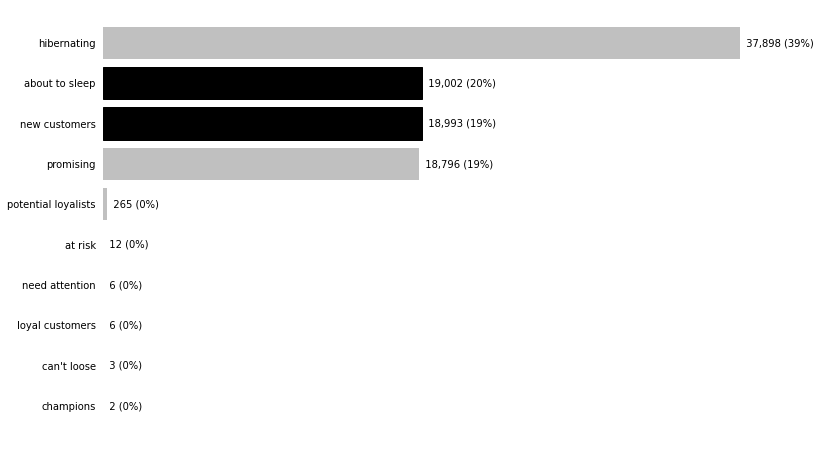

In [115]:
# Визуализирую верхнее дерево для наглядности
segments_counts = rfm_df['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(12,8))

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='Silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['about to sleep', 'new customers']:
            bar.set_color('Black')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '  {:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )
plt.show()

### Segmen ᅠ ᅠ ᅠ ᅠ ᅠᅠ  Description

**Champions**ᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠКупил недавно, покупает часто и тратьте больше всего

**Loyal Customers**ᅠᅠᅠᅠᅠᅠᅠПокупает на регулярной основе. Реагирует на рекламные акции.

**Potential Loyalist**ᅠᅠᅠᅠᅠᅠНедавний клиент со средней частотой.

**Recent Customers**ᅠᅠᅠᅠᅠᅠПокупает совсем недавно, но не часто.

**Promising**ᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠНедавние покупатель, но потратил немного.

**Needing Attention**ᅠᅠᅠᅠᅠНовый, частота и денежные показатели выше среднего. Возможно, покупка его не совсем недавняя.

**About To Sleep**ᅠᅠᅠᅠᅠᅠᅠНовый и частота ниже среднего. Он будет потерян, если не будет повторно активирован.

**At Risk**ᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠПриобретал часто, но очень давно. Нужно вернуть его обратно!

**Can’t Lose**ᅠᅠᅠᅠᅠᅠᅠᅠᅠРаньше часто покупал, но долгое время не возвращался.

**Hibernating**ᅠᅠᅠᅠᅠᅠᅠᅠᅠПоследняя покупка была давней и с низким количеством заказов. Может быть потерян.

У нас много клиентов, которые не часто покупают у нас (39% находятся в спящем режиме). Также примерно одинаковое кличество людей со статусами ***"About To Sleep"*** и ***"new customers"*** и их суммарный процент велик. Также недалеко ушли клиенты со статусом ***"Promising"***. Исходя из этого можно сделать вывод, что большенство клиентов в процессе пользования потеряли интерес, но суммарное количество новых клиентов и недавних покупателей дают надежду на поднятие активности.